In [ ]:
import pandas as pd
import tensorflow as tf

games_tourney = pd.read_csv('games_tourney.csv')




In [ ]:
games_season = pd.read_csv('games_season_enriched.csv')

games_season.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won,pred
0,1985,288,73,0,-3,-9,41,50,0,-3.601452
1,1985,5929,73,0,4,6,61,55,1,0.474164
2,1985,9884,73,0,5,-4,59,63,0,-0.414316
3,1985,73,288,0,3,9,50,41,1,3.601452
4,1985,3920,410,0,1,-9,54,63,0,8.176179


In [ ]:
# KERAS INPUT AND DESNE LAYERS Import Input from tensorflow.keras.layers
from tensorflow.keras.layers import Input

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

In [ ]:
import pandas as pd


In [ ]:
# Load layers
from tensorflow.keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

In [ ]:
# Load layers
from tensorflow.keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

In [ ]:
# Input/dense/output layers
from tensorflow.keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from tensorflow.keras.models import Model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


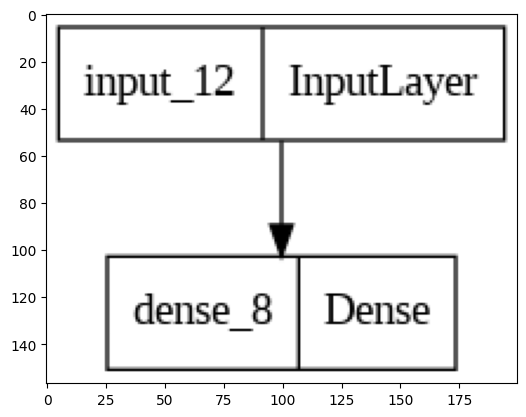

In [ ]:
# Import the plotting function
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

seed difference - input
score difference - output

So a positive seed difference is usually predictive of a negative score difference, and a negative seed difference is usually predictive of a positive score difference.

Batch size sets how many rows of data are used for each step of stochastic gradient descent. In this case, you'll train on 64 rows at a time. Validation split tells Keras to use a holdout set, and return metrics on accuracy using that data.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

games_tourney_x = ['seed_diff', 'pred']
games_tourney_y = ['score_diff', 'won']

games_tourney_x_train, games_tourney_x_test, games_tourney_y_train, games_tourney_y_test = train_test_split(games_tourney_x, games_tourney_y, random_state=0, train_size = .75)

games_tourney_x_train = np.array(games_tourney_x_train)
games_tourney_y_train = np.array(games_tourney_y_train)

games_tourney_x_train = pd.DataFrame(games_tourney_x_train)
games_tourney_y_train = pd.DataFrame(games_tourney_y_train)

TypeError: ignored

In [ ]:
# Now fit the model
model.fit(games_tourney_x_train['seed_diff'], games_tourney_y_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True)

KeyError: ignored

In [ ]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

Category Embedding

Input layer(int) - Embedding layers(lookup table) - Output layer(float)

Flatten() - advanced layer for deep learning models and can be used to transform data from multiple dimensions back down to two dimensions.

In [ ]:
# Imports
from tensorflow.keras.layers import Embedding
from numpy import unique

# Count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# Create an embedding layer
team_lookup = Embedding(input_dim=n_teams,
                        output_dim=1,
                        input_length=1,
                        name='Team-Strength')

In [ ]:
# Imports
from tensorflow.keras.layers import Input, Embedding, Flatten
from tensorflow.keras.models import Model

# Create an input layer for the team ID
teamid_in = Input(shape=(1,))

# Lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# Flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# Combine the operations into a single, re-usable model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

 shared layers


In [ ]:
# Load the input layer from tensorflow.keras.layers
from tensorflow.keras.layers import Input

# Input layer for team 1
team_in_1 = Input(shape=(1,), name='Team-1-In')

# Separate input layer for team 2
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Lookup team 1 in the team strength model
team_1_strength = team_strength_model(team_in_1)

# Lookup team 2 in the team strength model
team_2_strength = team_strength_model(team_in_2)

Merge layers

combine your inputs into a single layer that you can use to predict a single output

* Add()
* Subtract()
* Multiply()
* Concatenate()

In [ ]:
# Import the Subtract layer from tensorflow.keras
from tensorflow.keras.layers import Subtract

# Create a subtract layer using the inputs from the previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

In [ ]:
# Imports
from tensorflow.keras.layers import Subtract
from tensorflow.keras.models import Model

# Subtraction layer from previous exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# Create the model
model = Model([team_in_1, team_in_2], score_diff)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# Get the team_1 column from the regular season data
input_1 = games_season['team_1']

# Get the team_2 column from the regular season data
input_2 = games_season['team_2']

# Fit the model to input 1 and 2, using score diff as a target
model.fit([input_1, input_2],
          games_season['score_diff'],
          epochs=1,
          batch_size=2048,
          validation_split=0.10,
          verbose=True)

In [ ]:
# Get team_1 from the tournament data

input_1 = games_tourney['team_1']

# Get team_2 from the tournament data
input_2 = games_tourney['team_2']

# Evaluate the model using these inputs
print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=False))

Three input models

In [ ]:
# Create an Input for each team
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')

# Create an input for home vs away
home_in = Input(shape=(1,), name='Home-In')

# Lookup the team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

In [ ]:
# Import the model class
from tensorflow.keras.models import Model

# Make a Model
model = Model([team_in_1, team_in_2, home_in], out)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# Fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1,
          verbose=True,
          validation_split=.10,
          batch_size=2048)

# Evaluate the model on the games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
               games_tourney['score_diff'], verbose=False))

In [ ]:
# Imports
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

Model Stacking

In [ ]:
# Predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']])



In [ ]:
# Create an input layer with 3 columns
input_tensor = Input((3,))

# Pass it to a Dense layer with 1 unit
output_tensor = Dense(1)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1,
          verbose=True)

# Evaluate the model on the games_tourney_test dataset
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'prediction']],
               games_tourney_test['score_diff'], verbose=False))

In [ ]:
# Define the input
input_tensor = Input((2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
  		  games_tourney_train[['score_1', 'score_2']],
  		  verbose=True,
  		  epochs=100,
  		  batch_size=16384)

In [ ]:
# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
print(games_tourney_train.mean())

In [ ]:
# Evaluate the model on the tournament test data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']], games_tourney_test[['score_1', 'score_2']], verbose=False))

Build a simple regressor/classifier

Input layer - Regression output - classifictaion output(sigmoid)

In [ ]:
# Create an input layer with 2 columns
input_tensor = Input((2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2])

In [ ]:
# Import the Adam optimizer
from tensorflow.keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(learning_rate=0.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

In [ ]:
# Print the model weights
print(model.get_weights())

# Print the training data means
print(games_tourney_train[['seed_diff', 'pred']].mean())

In [ ]:
# Import the sigmoid function from scipy
from scipy.special import expit as sigmoid

# Weight from the model
weight = 0.14

# Print the approximate win probability predicted close game
print(sigmoid(1 * weight))

# Print the approximate win probability predicted blowout game
print(sigmoid(10 * weight))

In [ ]:
# Evaluate the model on new data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))